 # **CRISP-DM:**

![](https://www.researchgate.net/profile/Vernon-Dsouza/publication/326235288/figure/fig1/AS:645518493495296@1530915010595/CRISP-DM-Model-Taylor-2017.png)

**CRISP-DM Step 1: Business Understanding**

In [1]:
# Step 1: Business Understanding
# Objective: Predict survival on the Titanic based on passenger features.
# Goal: Understand the importance of data science in making predictions and informing decisions.

**CRISP-DM Step 2: Data Understanding**

In [2]:
# Step 2: Data Understanding
import pandas as pd

# Load the Titanic dataset
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/refs/heads/master/titanic.csv'
titanic_df = pd.read_csv(url)

# Explore the data
print(titanic_df.info())  # Check for null values and data types
print(titanic_df.describe())  # Summary statistics
print(titanic_df.head())  # Preview the first few rows of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.48659

**CRISP-DM Step 2: Data Understanding using Data Visualization**

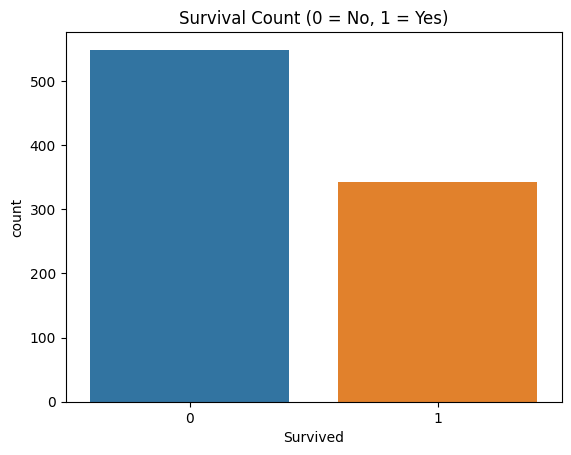

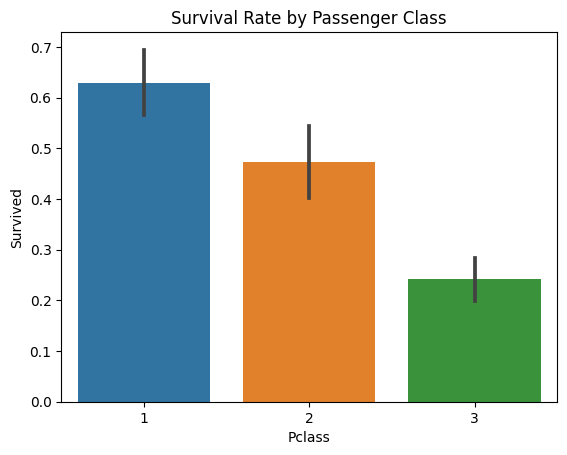

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

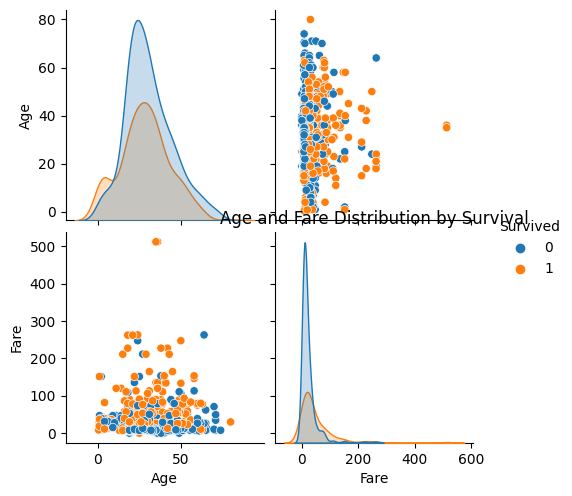

In [3]:
# Step 3: Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the distribution of survival
sns.countplot(x='Survived', data=titanic_df)
plt.title('Survival Count (0 = No, 1 = Yes)')
plt.show()

# Visualize survival by class
sns.barplot(x='Pclass', y='Survived', data=titanic_df)
plt.title('Survival Rate by Passenger Class')
plt.show()

# Explore relationships between features
sns.pairplot(titanic_df, hue='Survived', vars=['Age', 'Fare'])
plt.title('Age and Fare Distribution by Survival')
plt.show()

# **Other Data Visualization tools**

![](https://getondata.com/wp-content/uploads/2023/11/GOD-inner-image-Best-Data-Visualization-Tools-for-2024.jpg)

**CRISP-DM Step 3: Data Preparation**

In [4]:
# Step 3: Data Preparation
# Remove null values and fill missing data
titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)  # Fill missing Age with median
titanic_df.drop(columns=['Cabin', 'Ticket'], inplace=True)  # Drop columns with too many missing values
titanic_df.dropna(inplace=True)  # Drop any remaining null values

# Convert categorical variables to numeric
titanic_df['Sex'] = titanic_df['Sex'].map({'male': 0, 'female': 1})  # Encode gender
titanic_df = pd.get_dummies(titanic_df, columns=['Embarked'], drop_first=True)  # One-hot encoding for Embarked

# Prepare features and target variable
X = titanic_df.drop(columns=['Survived', 'Name', 'PassengerId'])  # Features
y = titanic_df['Survived']  # Target variable

/tmp/ipykernel_17/1952057265.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)  # Fill missing Age with median


# **Other Data Preparation tools**

![](https://d31wr468xgaoff.cloudfront.net/insights/wp-content/uploads/2024/02/The-Top-10-Data-Preparation-Solutions-.001.png)

**CRISP-DM Step 5: Modeling**

In [5]:
# Step 5: Modeling
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

![](https://copyassignment.com/wp-content/uploads/2022/07/Data-1024x576.png)

**CRISP-DM Step 6: Evaluation**

In [6]:
# Step 6: Evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Make predictions
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)

Accuracy: 0.77
Confusion Matrix:
[[85 24]
 [17 52]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.78      0.81       109
           1       0.68      0.75      0.72        69

    accuracy                           0.77       178
   macro avg       0.76      0.77      0.76       178
weighted avg       0.78      0.77      0.77       178



**CRISP-DM Step 7: Deployment**

In [7]:
# Step 7: Deployment
# In a real-world scenario, the model would be saved and used to predict survival for new passengers.
# This could involve creating a simple user interface for inputting passenger details.

![](https://cdn.prod.website-files.com/61ddc75d84e094838db1bc9e/66021a35babefde18305c40f_Group%204633.png)

**Summary**

This structured approach using the Titanic dataset introduces beginners to key data science concepts, including data understanding, visualization, preparation, modeling, and evaluation. The Titanic dataset is engaging and allows students to see the relevance of data science in solving real-world problems. The steps encourage hands-on interaction, especially during data visualization and preparation.